In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os

In [47]:
np.__version__

'1.19.1'

In [48]:
data_folder = '../../data'
with open(os.path.join(data_folder, 'all_data.npy'), 'rb') as f:
    np_data = np.load(f)

In [49]:
sampling_freq = 50
features_needed = [2, 3]

In [50]:
np_data[:, sampling_freq*30:sampling_freq*40, :].shape

(362, 500, 8)

In [51]:
trimmed_train_data = np_data[:360, sampling_freq*30:sampling_freq*40, features_needed]
trimmed_test_data = np_data[360:, sampling_freq*30:sampling_freq*40, features_needed]

In [54]:
feature_maps = {
    0: 'x',
    1: 'y',
    2: 'Forward Velocity',
    3: 'Angular Velocity',
    4: 'Theta',
    5: 'Unwrapped Theta',
    6: 'Upwind Velocity',
    7: 'Fly ID'
}

In [55]:
all_series_data = np.concatenate(trimmed_train_data[:, :, :])
lengths = [trimmed_train_data.shape[1]] * trimmed_train_data.shape[0]

In [56]:
all_series_data

array([[ 7.8664  , 16.761   ],
       [ 5.4903  , 40.158   ],
       [ 3.332   , 60.836   ],
       ...,
       [ 0.11669 , -4.1955  ],
       [ 0.098064, -3.6343  ],
       [ 0.079687, -2.9174  ]])

In [57]:
from hmmlearn import hmm
from hmmlearn.base import ConvergenceMonitor

np.random.seed(42)

model = hmm.GaussianHMM(n_components=10,  verbose=True, n_iter=10000)


model.monitor_ = ConvergenceMonitor(tol=0.01, n_iter=10000, verbose=True)
print(model.monitor_)

ConvergenceMonitor(
    history=[],
    iter=0,
    n_iter=10000,
    tol=0.01,
    verbose=True,
)


In [58]:
model.fit(all_series_data, lengths)

         1    -1688657.8867             +nan
         2    -1514508.0223     +174149.8644
         3    -1370484.9975     +144023.0248
         4    -1248918.0052     +121566.9922
         5    -1191744.5566      +57173.4486
         6    -1153038.5095      +38706.0471
         7    -1127561.6815      +25476.8281
         8    -1111465.5830      +16096.0984
         9    -1102451.0166       +9014.5664
        10    -1097389.7274       +5061.2892
        11    -1094357.8131       +3031.9143
        12    -1092451.9556       +1905.8575
        13    -1091093.4216       +1358.5340
        14    -1090042.2892       +1051.1325
        15    -1089314.9426        +727.3466
        16    -1088770.0931        +544.8495
        17    -1088320.4862        +449.6069
        18    -1087974.1056        +346.3805
        19    -1087703.6314        +270.4742
        20    -1087496.7765        +206.8549
        21    -1087356.2719        +140.5046
        22    -1087265.7698         +90.5021
        23

       184    -1035632.3007          +3.8225
       185    -1035628.7966          +3.5041
       186    -1035625.5381          +3.2585
       187    -1035622.4827          +3.0554
       188    -1035619.6019          +2.8807
       189    -1035616.8755          +2.7264
       190    -1035614.2882          +2.5874
       191    -1035611.8281          +2.4601
       192    -1035609.4860          +2.3421
       193    -1035607.2543          +2.2317
       194    -1035605.1266          +2.1276
       195    -1035603.0978          +2.0289
       196    -1035601.1631          +1.9347
       197    -1035599.3186          +1.8445
       198    -1035597.5607          +1.7579
       199    -1035595.8861          +1.6746
       200    -1035594.2917          +1.5944
       201    -1035592.7748          +1.5169
       202    -1035591.3326          +1.4422
       203    -1035589.9624          +1.3701
       204    -1035588.6619          +1.3006
       205    -1035587.4283          +1.2336
       206

GaussianHMM(n_components=10, n_iter=10000, verbose=True)

In [59]:
for i in range(trimmed_test_data.shape[0]):
    print(model.predict(trimmed_test_data[i][:, :]))

[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 0 0 2 2 7 7 7 7 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 8
 8 8 8 8 8 8 8 8 8 8 8 8 

In [60]:
trimmed_test_data[0].shape

(500, 2)

0 0
0 1
1 0
1 1


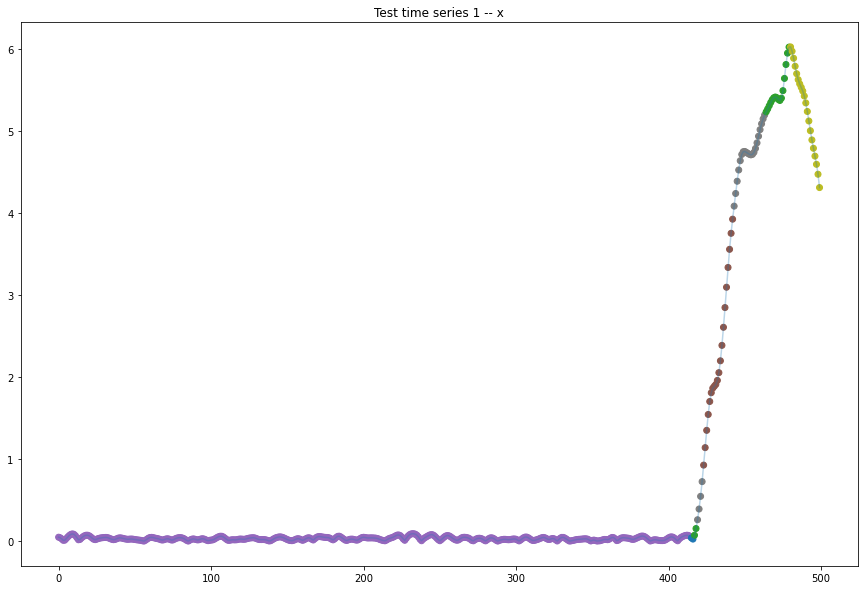

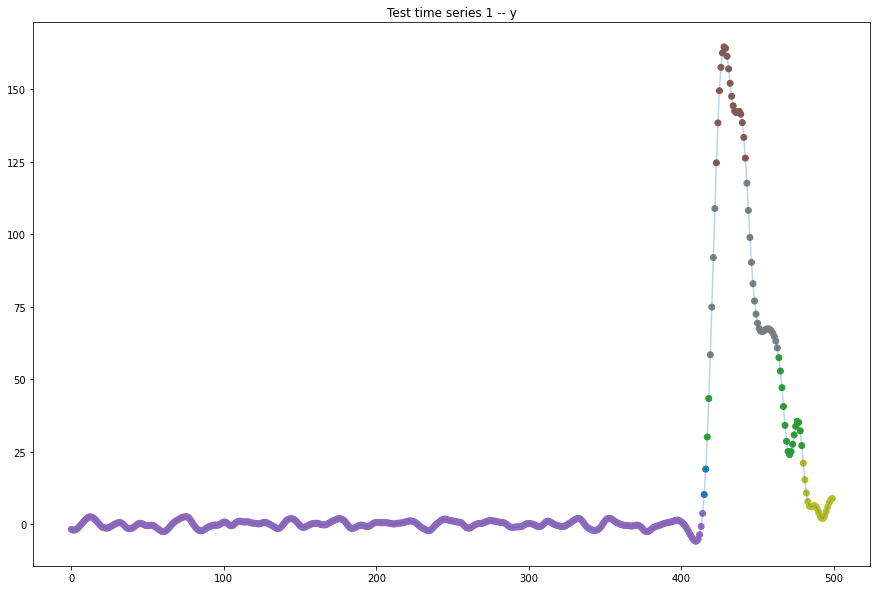

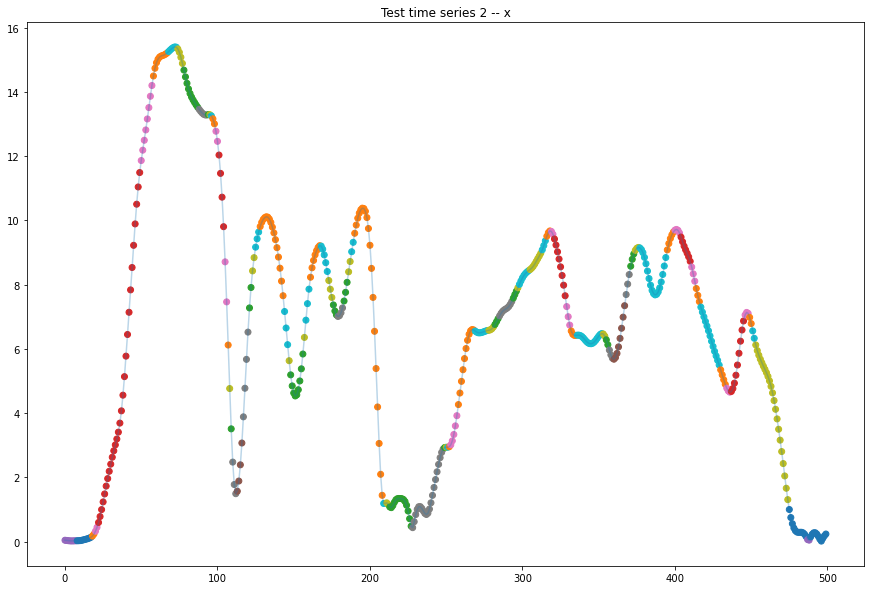

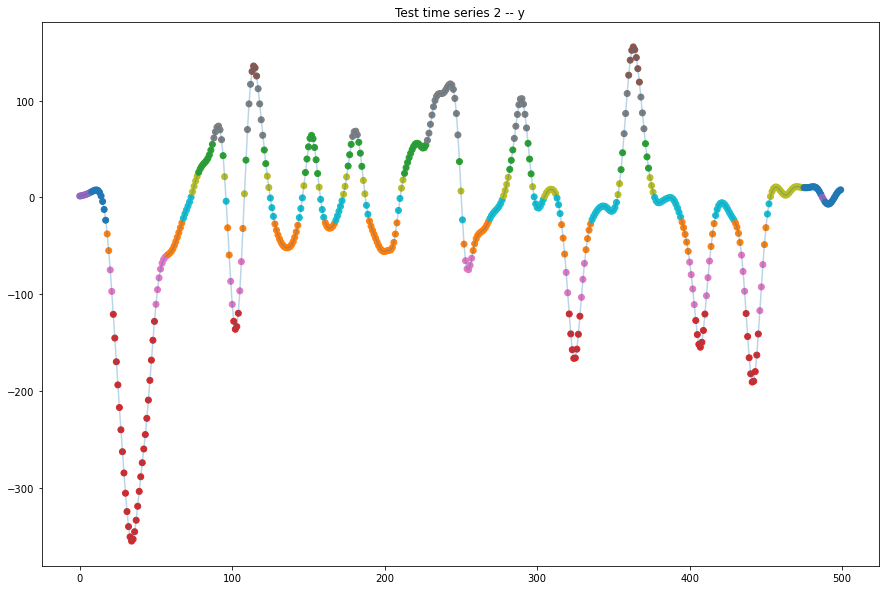

In [80]:
for i in range(trimmed_test_data.shape[0]):
    predictions = model.predict(trimmed_test_data[i])
    for j in range(trimmed_test_data[i].shape[1]):
        print(i, j)
        plt.figure(figsize=(15, 10))
        plt.plot(range(len(trimmed_test_data[i][:, j])), trimmed_test_data[i][:, j], alpha=0.3)
        plt.scatter(range(len(trimmed_test_data[i][:, j])), trimmed_test_data[i][:, j], c=predictions, cmap='tab10', vmin=0, vmax=9)

        plt.title(f"Test time series {i+1} -- {feature_maps[j]}")
        

In [69]:
model.sample(500, random_state=43)[0].shape

(500, 2)

In [70]:
sampled_fvel = np.zeros((500, 30))
sampled_avel = np.zeros((500, 30))
for i in range(0, 30):
    series = model.sample(500, random_state=i)[0]
    sampled_fvel[:, i] =  series[:, 0]
    sampled_avel[:, i] =  series[:, 1]

In [73]:
pd.DataFrame(sampled_fvel).to_csv('sampled_fvel.csv')
pd.DataFrame(sampled_avel).to_csv('sampled_avel.csv')

In [74]:
pd.DataFrame(sampled_avel)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.455630,-210.500084,-169.644176,-2.074694,-7.508783,-3.088314,19.443227,-3.359367,0.341784,-40.349163,...,128.902140,10.235062,-26.797082,-1.871357,-15.432743,-0.106358,-22.358931,-143.487313,66.642107,9.146919
1,3.700059,-197.294655,-258.273800,-0.575539,-18.321076,24.631293,41.658574,0.236129,-19.904947,-3.946960,...,122.320874,10.500788,-5.094184,-0.755258,-13.240184,4.856369,-91.621374,-161.072527,88.373226,26.217400
2,2.501188,-285.746431,-244.180255,-0.939630,-0.023349,-19.282258,20.239250,-1.694860,27.563845,-3.001771,...,220.322266,-7.335638,-10.585038,1.461548,-0.334739,25.268605,-54.520561,-139.181756,82.808230,15.209414
3,1.494393,-156.463492,-145.262298,-2.641585,14.441660,1.810789,56.780240,10.255216,7.988288,6.371373,...,191.287256,-2.192090,0.195791,-2.102557,-23.034648,5.125188,-84.221032,-144.876999,187.861539,17.984645
4,0.942786,-213.282552,-237.106398,-0.714957,-5.031050,-6.255661,59.012600,-1.757359,-17.328277,5.667990,...,205.937162,3.873558,-7.818412,-1.717847,0.815000,3.314259,-102.444224,-223.861356,235.498520,57.790045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.755517,0.928813,-106.086001,14.245263,7.808072,4.491743,75.082552,2.504736,26.285253,-66.556536,...,-38.985027,-174.545241,-43.298793,8.537425,-1.613768,21.549969,-19.272069,-83.389830,-39.759601,-49.538964
496,0.710845,2.207580,-181.111413,16.888542,20.252932,13.559345,87.134507,4.657233,34.764703,-157.544630,...,-45.589977,-123.851390,-9.369529,13.575249,2.208273,9.809104,-13.931568,-95.111170,-37.314151,-112.239409
497,-0.985890,-0.061114,-288.228468,7.734679,9.340201,17.444154,99.276338,0.294343,29.694442,-113.864893,...,-58.794549,-177.904725,4.515604,-6.259429,2.960769,34.139245,-17.976884,-77.581442,-46.106508,-89.402059
498,0.739595,2.673113,-87.577607,9.531484,11.086739,30.951767,53.979953,-9.205294,56.979157,-137.726723,...,-88.205952,-166.456850,0.954467,6.800687,0.620496,37.001679,-57.051842,-95.440963,-62.605395,-93.712686


In [76]:
import pickle

# To save model
with open("model.pkl", "wb") as file: 
    pickle.dump(model, file)

In [79]:
# # To Load
# with open("model.pkl", "rb") as file: 
#     model = pickle.load(file)